<a href="https://colab.research.google.com/github/vikrantmehta123/dl-for-coders-workbook/blob/main/Fastbook_05_Pet_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Deep Learning for Coders: Chapter 5

Here we re-implement the 5th chapter of the workbook.

In [1]:
# installation
! [ -e /content ] && pip install -Uqq fastbook;
import fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
# Imports
from fastbook import *
from fastai.vision.all import *

### Pets Data:

The pets data is present in `URLs.PETS`, which we can extract. There are 7393 samples in the images dataset, which have images across 37 pet categories. Here, we extract the data.

In [3]:
path = untar_data(URLs.PETS)

In [4]:
Path.BASE_PATH = path

In [5]:
(path/"images").ls()

(#7393) [Path('images/basset_hound_24.jpg'),Path('images/great_pyrenees_42.jpg'),Path('images/Egyptian_Mau_63.jpg'),Path('images/havanese_141.jpg'),Path('images/leonberger_157.jpg'),Path('images/english_setter_167.jpg'),Path('images/english_setter_116.jpg'),Path('images/leonberger_91.jpg'),Path('images/basset_hound_90.jpg'),Path('images/saint_bernard_84.jpg')...]

In [6]:
(path/"images").ls()[0].name

'basset_hound_24.jpg'

### Create the DataLoaders

Here, we create the FastAI's DataBlock and the DataLoaders for the dataset. We are applying `item_tfms` and `batch_tfms` both.

In [7]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

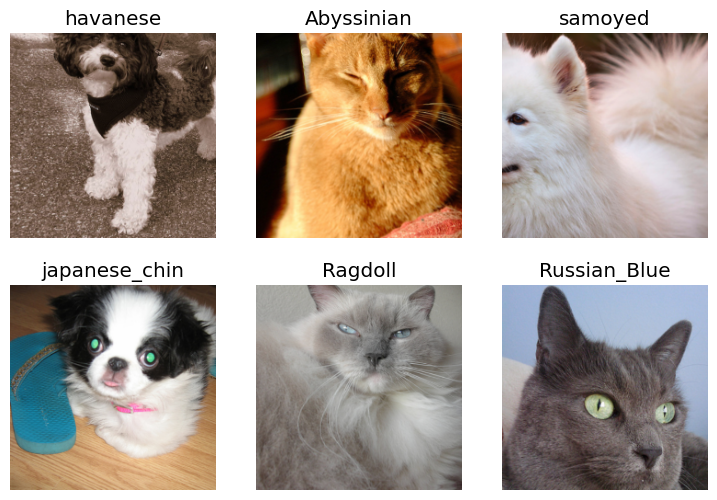

In [8]:
# Visualize
dls.show_batch(nrows=2, ncols=3)

In [9]:
# Summary of the DataBlock pipeline
pets.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_161.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_161.jpg
    applying partial gives
      yorkshire_terrier
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(36)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(36))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False

In [10]:
x,y = dls.one_batch()
y.shape

torch.Size([64])

### Train Vision Learner:

We fine tune the vision learner using the pretrained ResNet34 architecture. We fine tune the model for one epoch.

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 64.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.531547,0.373789,0.123139,01:25


epoch,train_loss,valid_loss,error_rate,time
0,0.464793,0.256307,0.082544,01:18


In [12]:
# Predict on one batch
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([3.7730e-05, 1.3882e-04, 3.3113e-06, 1.1784e-03, 2.7731e-04, 2.1906e-05, 2.7977e-06, 2.4091e-05, 5.9217e-06, 8.8852e-05, 1.1358e-05, 1.4342e-03, 1.1109e-02, 8.8186e-01, 2.1827e-04, 1.7858e-04,
        5.4009e-03, 2.6909e-05, 1.0711e-05, 8.9952e-06, 1.7068e-02, 2.0778e-05, 1.2183e-05, 5.7656e-06, 6.5151e-05, 8.9339e-06, 3.4169e-03, 1.1802e-04, 1.0064e-04, 2.9500e-05, 9.0347e-05, 4.1804e-05,
        7.4532e-05, 2.4964e-04, 7.6626e-02, 2.0004e-05, 1.3140e-05])

In [13]:
# Sanity check for predictions
preds[0].shape, preds[0].sum()

(torch.Size([37]), tensor(1.0000))

### Plot the Sigmoid

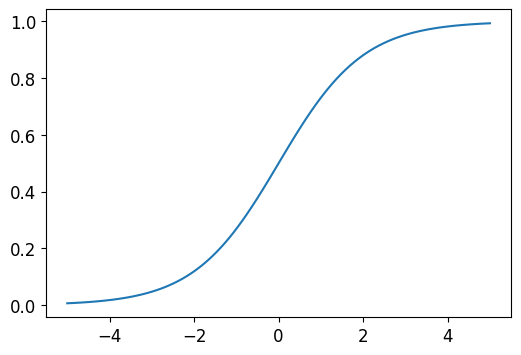

In [14]:
plot_function(torch.sigmoid, min=-5, max=5)

### Building Up To the Softmax and Cross Entropy Loss:

In [15]:
torch.random.manual_seed(42);
acts = torch.randn((6,2))*2
print(acts)

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])


In [16]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [17]:
torch.softmax(acts, dim=1)

tensor([[0.6025, 0.3975],
        [0.5021, 0.4979],
        [0.1332, 0.8668],
        [0.9966, 0.0034],
        [0.5959, 0.4041],
        [0.3661, 0.6339]])

In [18]:
loss_func = torch.nn.CrossEntropyLoss()

### Interpreting the Results:

Here, we plot the confusion matrix and get the top most confused categories from the model.

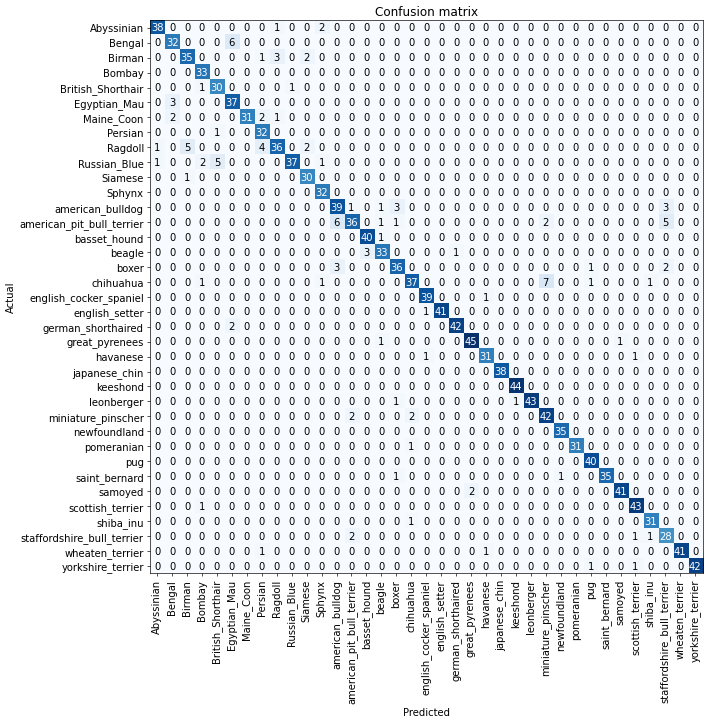

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=5)

[('chihuahua', 'miniature_pinscher', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('american_pit_bull_terrier', 'american_bulldog', 6),
 ('Ragdoll', 'Birman', 5),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5)]

### Improving the Model:

Here, we improve the model by finding an appropriate learning rate using the `lr_find` function from FastAI.

/usr/local/lib/python3.10/dist-packages/fastai/learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device, **torch_load_kwargs

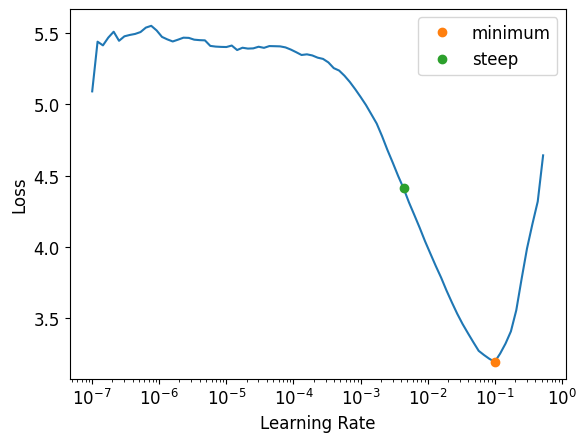

In [21]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))

In [22]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2, base_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.270778,0.305567,0.092693,01:11


epoch,train_loss,valid_loss,error_rate,time
0,0.532905,0.383578,0.119756,01:13
1,0.337755,0.254213,0.075778,01:19


### Trying out Complex Model:

Here we try out a more complex model with mixed-precision training.

In [23]:
from fastai.callback.fp16 import *
learn = vision_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn.fine_tune(6, freeze_epochs=3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 199MB/s]
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,error_rate,time
0,2.230438,0.503031,0.156969,01:09
1,0.864974,0.342067,0.110284,01:13
2,0.556776,0.337343,0.102165,01:10


epoch,train_loss,valid_loss,error_rate,time
0,0.300815,0.244640,0.072395,01:10
1,0.238493,0.289469,0.080514,01:14
2,0.203157,0.223795,0.064953,01:10
3,0.135602,0.231038,0.066982,01:09
4,0.081587,0.229048,0.061570,01:14
5,0.067730,0.215933,0.056834,01:10
